<font color=black>
# Odi Series Analysis
</font>
### Dataset scraped for <i><b>cricinfo</b></i> and <i><b>espn<b></i> using beautifulsoup


#### Libraries Used:-
<ol>
<li>pandas</li>
<li>numpy</li>
<li>matplotlib</li>
 </ol>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import warnings
warnings.filterwarnings('ignore')

##### Loading The dataset 


In [2]:
odi=pd.read_csv('Complete ODI Record.csv')
odi.head()

,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date
0,ODI # 1,Australia,England,Australia,5 wickets,Melbourne,05-Jan-71
1,ODI # 2,England,Australia,England,6 wickets,Manchester,24-Aug-72
2,ODI # 3,England,Australia,Australia,5 wickets,Lord's,26-Aug-72
3,ODI # 4,England,Australia,England,2 wickets,Birmingham,28-Aug-72
4,ODI # 5,New Zealand,Pakistan,New Zealand,22 runs,Christchurch,11-Feb-73


##### Checking for null values in the dataset


In [3]:
odi.isnull().sum()

Scorecard       0
Team 1          0
Team 2          0
Winner          0
Margin        185
Ground          0
Match Date      0
dtype: int64

In [4]:
odi.shape

(4098, 7)

### Extract Matches involving INDIA



In [5]:
ds_india=odi[(odi['Team 1']=='India') | (odi['Team 2']=='India')]

In [6]:
def fix_date(x):
    x1=x.split()
    x1[1]=x1[1][:2]
    x1[2]=x1[2][2:]
    return x1[1]+'-'+x1[0]+'-'+x1[2]
ds_india['Match Date']=ds_india['Match Date'].apply(lambda x:x if len(x)<=9 else fix_date(x))
ds_india['Match Date']=pd.to_datetime(ds_india['Match Date'])
ds_india['Match Year']=ds_india['Match Date'].dt.year
ds_india['Match Month']=ds_india['Match Date'].dt.month
ds_india['Match Day']=ds_india['Match Date'].dt.day

### Total<b><i><u> 961</u></b></i> matches of INDIA in the dataset 


In [7]:
ds_india.shape

(961, 10)

### Different ground India has played on  


In [8]:
ds_india['Ground'].unique()

array(['Leeds', 'The Oval', "Lord's", 'Manchester', 'Christchurch',
       'Auckland', 'Quetta', 'Sialkot', 'Sahiwal', 'Birmingham',
       'Melbourne', 'Perth', 'Sydney', 'Brisbane', 'Adelaide', 'Hamilton',
       'Ahmedabad', 'Jalandhar', 'Cuttack', 'Amritsar', 'Delhi',
       'Bengaluru', 'Gujranwala', 'Multan', 'Lahore', 'Karachi',
       'Port of Spain', 'Albion', "St George's", 'Leicester',
       'Nottingham', 'Tunbridge Wells', 'Chelmsford',
       'Hyderabad (Deccan)', 'Jaipur', 'Srinagar', 'Vadodara', 'Indore',
       'Jamshedpur', 'Guwahati', 'Sharjah', 'New Delhi',
       'Thiruvananthapuram', 'Pune', 'Nagpur', 'Chandigarh',
       'Colombo (SSC)', 'Colombo (PSS)', 'Launceston', 'Rajkot', 'Kanpur',
       'Mumbai', 'Kolkata', 'Chennai', 'Faridabad', 'Gwalior',
       'Chittagong', 'Dhaka', 'Visakhapatnam', 'Bridgetown', "St John's",
       'Georgetown', 'Dunedin', 'Wellington', 'Margao', 'Hobart',
       'Mackay', 'Harare', 'Cape Town', 'Port Elizabeth', 'Centurion',
      

### Creating a new feature <b><i><u> Home Ground</u></i></b> for INDIA

In [ ]:
# home_gr=['Ahmedabad', 'Jalandhar', 'Cuttack', 'Amritsar', 'Delhi',
       'Bengaluru', 'Hyderabad (Deccan)', 'Jaipur', 'Srinagar', 'Vadodara', 'Indore',
       'Jamshedpur', 'Guwahati', 'New Delhi',
       'Thiruvananthapuram', 'Pune', 'Nagpur', 'Chandigarh','Rajkot', 'Kanpur',
       'Mumbai', 'Kolkata', 'Chennai', 'Faridabad', 'Gwalior',
       'Visakhapatnam', 'Mohali', 'Napier', 'Mumbai (BS)',
       'Hyderabad (Sind)', 'Kochi','Jodhpur',
       'Vijayawada','Ranchi', 'Dharamsala']
ds_india['Home/Away']=ds_india['Ground'].apply(lambda x:'Home' if x in home_gr else 'Away')

### Mapping<b><i><u>Win/Loss</u></i></b> to the dataset

In [10]:
ds_india['Ind Win/Loss']=ds_india['Winner'].apply(lambda x:'Win' if x=='India' else ('Tie' if x=='no result' or x=='tied' or x=='-' else 'Loss'))

### Mapping <b><i><u>Chase/Defending</u></i></b> to the Dataset

In [11]:
ds_india['WinBat First/Second']=ds_india['Margin'].apply(lambda x:'First' if 'runs' in str(x).split() else ('Second' if 'wickets' in str(x).split() else 'NR'))

In [12]:
ds_india=ds_india.drop(['Scorecard', 'Match Date'], axis=1)
ds_india.head()

,Team 1,Team 2,Winner,Margin,Ground,Match Year,Match Month,Match Day,Home/Away,Ind Win/Loss,WinBat First/Second
11,England,India,England,4 wickets,Leeds,1974,7,13,Away,Loss,Second
12,England,India,England,6 wickets,The Oval,1974,7,15,Away,Loss,Second
18,England,India,England,202 runs,Lord's,1975,6,7,Away,Loss,First
23,East Africa,India,India,10 wickets,Leeds,1975,6,11,Away,Win,Second
27,India,New Zealand,New Zealand,4 wickets,Manchester,1975,6,14,Away,Loss,Second


In [13]:
plot=ds_india.groupby(['Ind Win/Loss', 'Home/Away']).agg('count').reset_index()

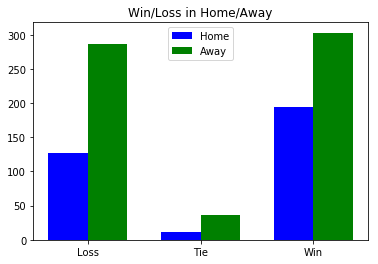

In [14]:
N = 3
Home = plot[plot['Home/Away']=='Home']['Team 1'].values

fig, ax = plt.subplots()

ind = np.arange(N)   
width = 0.35
p1 = ax.bar(ind, Home, width, color='b')


Away = plot[plot['Home/Away']=='Away']['Team 1'].values
p2 = ax.bar(ind + width, Away, width,
            color='g')

ax.set_title('Win/Loss in Home/Away')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('Loss', 'Tie', 'Win'))

ax.legend((p1[0], p2[0]), ('Home', 'Away'))
ax.autoscale_view()

plt.show()


In [15]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

In [16]:
p1=ds_india[(ds_india['Home/Away']=='Home') & (ds_india['Ind Win/Loss']=='Loss')].shape[0]
p2=ds_india[(ds_india['Home/Away']=='Home') & (ds_india['Ind Win/Loss']=='Tie')].shape[0]
p3=ds_india[(ds_india['Home/Away']=='Home') & (ds_india['Ind Win/Loss']=='Win')].shape[0]

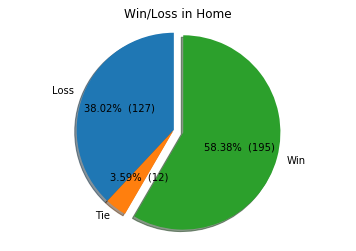

In [17]:
labels = 'Loss', 'Tie', 'Win'
explode = (0, 0, 0.1)

fig1, ax1 = plt.subplots()
ax1.set_title('Win/Loss in Home')
ax1.pie([p1, p2, p3], explode=explode, labels=labels, autopct=make_autopct([p1, p2, p3]),shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

In [18]:
ds_aus=ds_india[(ds_india['Team 1']=='Australia') | (ds_india['Team 2']=='Australia')]

In [19]:
p1=ds_aus[(ds_aus['Home/Away']=='Home') & (ds_aus['Ind Win/Loss']=='Loss')].shape[0]
p2=ds_aus[(ds_aus['Home/Away']=='Home') & (ds_aus['Ind Win/Loss']=='Tie')].shape[0]
p3=ds_aus[(ds_aus['Home/Away']=='Home') & (ds_aus['Ind Win/Loss']=='Win')].shape[0]

# Win/Loss in Home vs Aus

In [ ]:
# labels = 'Loss', 'Tie', 'Win'
explode = (0, 0, 0.1)

fig1, ax1 = plt.subplots()
ax1.set_title('Win/Loss in Home vs Aus')
ax1.pie([p1, p2, p3], explode=explode, labels=labels, autopct=make_autopct([p1, p2, p3]),shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

# Ground Analysis


In [21]:
#Ground Analysis
gr_Mohali=ds_india[(ds_india['Ground']=='Mohali') | (ds_india['Ground']=='Chandigarh')]
gr_Delhi=ds_india[ds_india['Ground']=='Delhi']
gr_Hyd=ds_india[(ds_india['Ground']=='Hyderabad (Deccan)') | (ds_india['Ground']=='Hyderabad (Sind)')]
gr_Nagpur=ds_india[ds_india['Ground']=='Nagpur']
gr_Ranchi=ds_india[ds_india['Ground']=='Ranchi']

## Win/Loss in Mohali
## Win/Loss in Mohali vs Aus


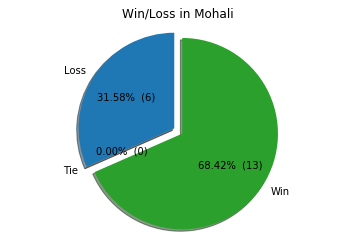

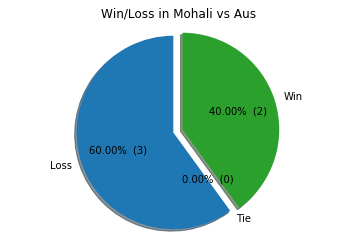

In [22]:
p1=gr_Mohali[gr_Mohali['Ind Win/Loss']=='Loss'].shape[0]
p2=gr_Mohali[gr_Mohali['Ind Win/Loss']=='Tie'].shape[0]
p3=gr_Mohali[gr_Mohali['Ind Win/Loss']=='Win'].shape[0]
p4=gr_Mohali[(gr_Mohali['Ind Win/Loss']=='Loss') & ((gr_Mohali['Team 1']=='Australia') | (gr_Mohali['Team 2']=='Australia'))].shape[0]
p5=gr_Mohali[(gr_Mohali['Ind Win/Loss']=='Tie') & ((gr_Mohali['Team 1']=='Australia') | (gr_Mohali['Team 2']=='Australia'))].shape[0]
p6=gr_Mohali[(gr_Mohali['Ind Win/Loss']=='Win') & ((gr_Mohali['Team 1']=='Australia') | (gr_Mohali['Team 2']=='Australia'))].shape[0]
labels = 'Loss', 'Tie', 'Win'
explode = (0, 0, 0.1)

fig1, ax1 = plt.subplots()
ax1.set_title('Win/Loss in Mohali')
ax1.pie([p1, p2, p3], explode=explode, labels=labels, autopct=make_autopct([p1, p2, p3]),shadow=True, startangle=90)
ax1.axis('equal')

fig2, ax2 = plt.subplots()
ax2.set_title('Win/Loss in Mohali vs Aus')
ax2.pie([p4, p5, p6], explode=explode, labels=labels, autopct=make_autopct([p4, p5, p6]),shadow=True, startangle=90)
ax2.axis('equal')

plt.show()

In [23]:
#Recent 5 Matches in Mohali Most Recent last
gr_Mohali.tail()['Ind Win/Loss']

3204     Win
3326     Win
3420    Loss
3797     Win
3940     Win
Name: Ind Win/Loss, dtype: object

## Win/Loss in Delhi
## Win/Loss in Delhi vs Aus


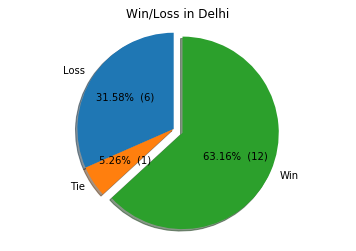

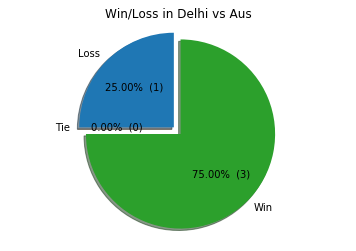

In [24]:
p1=gr_Delhi[gr_Delhi['Ind Win/Loss']=='Loss'].shape[0]
p2=gr_Delhi[gr_Delhi['Ind Win/Loss']=='Tie'].shape[0]
p3=gr_Delhi[gr_Delhi['Ind Win/Loss']=='Win'].shape[0]
p4=gr_Delhi[(gr_Delhi['Ind Win/Loss']=='Loss') & ((gr_Delhi['Team 1']=='Australia') | (gr_Delhi['Team 2']=='Australia'))].shape[0]
p5=gr_Delhi[(gr_Delhi['Ind Win/Loss']=='Tie') & ((gr_Delhi['Team 1']=='Australia') | (gr_Delhi['Team 2']=='Australia'))].shape[0]
p6=gr_Delhi[(gr_Delhi['Ind Win/Loss']=='Win') & ((gr_Delhi['Team 1']=='Australia') | (gr_Delhi['Team 2']=='Australia'))].shape[0]
labels = 'Loss', 'Tie', 'Win'
explode = (0, 0, 0.1)

fig1, ax1 = plt.subplots()
ax1.set_title('Win/Loss in Delhi')
ax1.pie([p1, p2, p3], explode=explode, labels=labels, autopct=make_autopct([p1, p2, p3]),shadow=True, startangle=90)
ax1.axis('equal')

fig2, ax2 = plt.subplots()
ax2.set_title('Win/Loss in Delhi vs Aus')
ax2.pie([p4, p5, p6], explode=explode, labels=labels, autopct=make_autopct([p4, p5, p6]),shadow=True, startangle=90)
ax2.axis('equal')

plt.show()

In [25]:
#Recent 5 Matches in Delhi Most Recent last
gr_Delhi.tail()['Ind Win/Loss']

3123     Win
3200     Win
3315     Win
3532     Win
3796    Loss
Name: Ind Win/Loss, dtype: object

## Win/Loss in Ranchi
## Win/Loss in Ranchi vs Aus


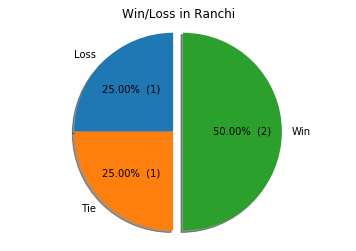

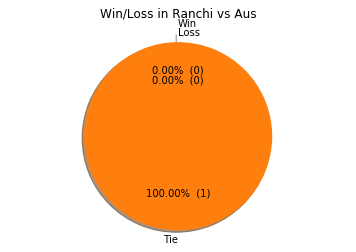

In [26]:
p1=gr_Ranchi[gr_Ranchi['Ind Win/Loss']=='Loss'].shape[0]
p2=gr_Ranchi[gr_Ranchi['Ind Win/Loss']=='Tie'].shape[0]
p3=gr_Ranchi[gr_Ranchi['Ind Win/Loss']=='Win'].shape[0]
p4=gr_Ranchi[(gr_Ranchi['Ind Win/Loss']=='Loss') & ((gr_Ranchi['Team 1']=='Australia') | (gr_Ranchi['Team 2']=='Australia'))].shape[0]
p5=gr_Ranchi[(gr_Ranchi['Ind Win/Loss']=='Tie') & ((gr_Ranchi['Team 1']=='Australia') | (gr_Ranchi['Team 2']=='Australia'))].shape[0]
p6=gr_Ranchi[(gr_Ranchi['Ind Win/Loss']=='Win') & ((gr_Ranchi['Team 1']=='Australia') | (gr_Ranchi['Team 2']=='Australia'))].shape[0]
labels = 'Loss', 'Tie', 'Win'
explode = (0, 0, 0.1)

fig1, ax1 = plt.subplots()
ax1.set_title('Win/Loss in Ranchi')
ax1.pie([p1, p2, p3], explode=explode, labels=labels, autopct=make_autopct([p1, p2, p3]),shadow=True, startangle=90)
ax1.axis('equal')

fig2, ax2 = plt.subplots()
ax2.set_title('Win/Loss in Ranchi vs Aus')
ax2.pie([p4, p5, p6], explode=explode, labels=labels, autopct=make_autopct([p4, p5, p6]),shadow=True, startangle=90)
ax2.axis('equal')

plt.show()

In [27]:
#Recent 4 Matches in Ranchi Most Recent last
gr_Ranchi.tail()['Ind Win/Loss']

3321     Win
3421     Tie
3546     Win
3798    Loss
Name: Ind Win/Loss, dtype: object

## Win/Loss in Hyderabad
## Win/Loss in Hyderabad vs Aus


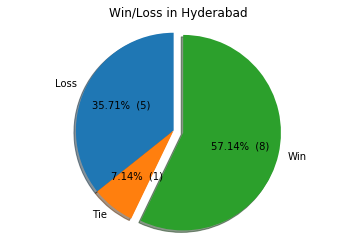

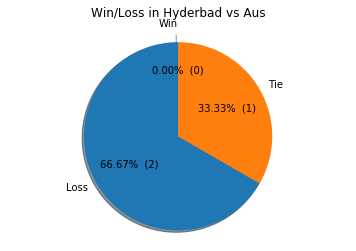

In [28]:
p1=gr_Hyd[gr_Hyd['Ind Win/Loss']=='Loss'].shape[0]
p2=gr_Hyd[gr_Hyd['Ind Win/Loss']=='Tie'].shape[0]
p3=gr_Hyd[gr_Hyd['Ind Win/Loss']=='Win'].shape[0]
p4=gr_Hyd[(gr_Hyd['Ind Win/Loss']=='Loss') & ((gr_Hyd['Team 1']=='Australia') | (gr_Hyd['Team 2']=='Australia'))].shape[0]
p5=gr_Hyd[(gr_Hyd['Ind Win/Loss']=='Tie') & ((gr_Hyd['Team 1']=='Australia') | (gr_Hyd['Team 2']=='Australia'))].shape[0]
p6=gr_Hyd[(gr_Hyd['Ind Win/Loss']=='Win') & ((gr_Hyd['Team 1']=='Australia') | (gr_Hyd['Team 2']=='Australia'))].shape[0]
labels = 'Loss', 'Tie', 'Win'
explode = (0, 0, 0.1)

fig1, ax1 = plt.subplots()
ax1.set_title('Win/Loss in Hyderabad')
ax1.pie([p1, p2, p3], explode=explode, labels=labels, autopct=make_autopct([p1, p2, p3]),shadow=True, startangle=90)
ax1.axis('equal')

fig2, ax2 = plt.subplots()
ax2.set_title('Win/Loss in Hyderbad vs Aus')
ax2.pie([p4, p5, p6], explode=explode, labels=labels, autopct=make_autopct([p4, p5, p6]),shadow=True, startangle=90)
ax2.axis('equal')

plt.show()

In [29]:
#Recent 5 Matches in Hyderabad Most Recent last
gr_Hyd.tail()['Ind Win/Loss']

2296    Loss
2624    Loss
2922    Loss
3198     Win
3542     Win
Name: Ind Win/Loss, dtype: object

# Win/Loss in Nagpur
## Win/Loss in Nagpur vs Aus


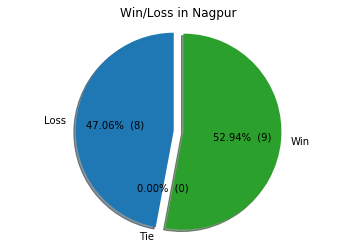

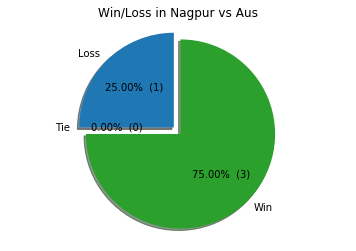

In [30]:
p1=gr_Nagpur[gr_Nagpur['Ind Win/Loss']=='Loss'].shape[0]
p2=gr_Nagpur[gr_Nagpur['Ind Win/Loss']=='Tie'].shape[0]
p3=gr_Nagpur[gr_Nagpur['Ind Win/Loss']=='Win'].shape[0]
p4=gr_Nagpur[(gr_Nagpur['Ind Win/Loss']=='Loss') & ((gr_Nagpur['Team 1']=='Australia') | (gr_Nagpur['Team 2']=='Australia'))].shape[0]
p5=gr_Nagpur[(gr_Nagpur['Ind Win/Loss']=='Tie') & ((gr_Nagpur['Team 1']=='Australia') | (gr_Nagpur['Team 2']=='Australia'))].shape[0]
p6=gr_Nagpur[(gr_Nagpur['Ind Win/Loss']=='Win') & ((gr_Nagpur['Team 1']=='Australia') | (gr_Nagpur['Team 2']=='Australia'))].shape[0]
labels = 'Loss', 'Tie', 'Win'
explode = (0, 0, 0.1)

fig1, ax1 = plt.subplots()
ax1.set_title('Win/Loss in Nagpur')
ax1.pie([p1, p2, p3], explode=explode, labels=labels, autopct=make_autopct([p1, p2, p3]),shadow=True, startangle=90)
ax1.axis('equal')

fig2, ax2 = plt.subplots()
ax2.set_title('Win/Loss in Nagpur vs Aus')
ax2.pie([p4, p5, p6], explode=explode, labels=labels, autopct=make_autopct([p4, p5, p6]),shadow=True, startangle=90)
ax2.axis('equal')

plt.show()

In [31]:
#REccent 5 Matches in Nagpur Most Recent last
gr_Nagpur.tail()['Ind Win/Loss']

2914     Win
2932    Loss
3127    Loss
3423     Win
3918     Win
Name: Ind Win/Loss, dtype: object

# Last 20 Matches Record at Home


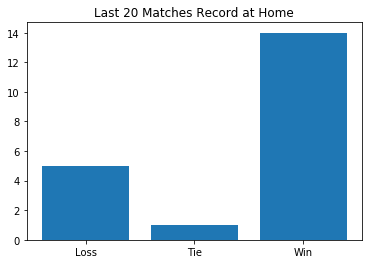

In [32]:
record_last20=ds_india[ds_india['Home/Away']=='Home'].tail(20)
p1=record_last20[record_last20['Ind Win/Loss']=='Loss'].shape[0]
p2=record_last20[record_last20['Ind Win/Loss']=='Tie'].shape[0]
p3=record_last20[record_last20['Ind Win/Loss']=='Win'].shape[0]
plt.bar(np.arange(3),[p1,p2,p3])
plt.xticks(np.arange(3), ['Loss', 'Tie', 'Win'])
plt.title('Last 20 Matches Record at Home')
plt.show()

### Last 20 Matches Record at Home vs Aus

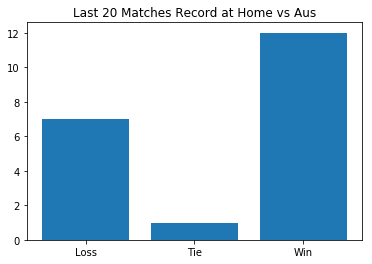

In [33]:
record_last20=ds_india[(ds_india['Home/Away']=='Home') & ((ds_india['Team 1']=='Australia') | (ds_india['Team 2']=='Australia'))].tail(20)
p1=record_last20[record_last20['Ind Win/Loss']=='Loss'].shape[0]
p2=record_last20[record_last20['Ind Win/Loss']=='Tie'].shape[0]
p3=record_last20[record_last20['Ind Win/Loss']=='Win'].shape[0]
plt.bar(np.arange(3),[p1,p2,p3])
plt.xticks(np.arange(3), ['Loss', 'Tie', 'Win'])
plt.title('Last 20 Matches Record at Home vs Aus')
plt.show()

### Series Analysis for India


In [34]:
ds_series=pd.read_csv('Series India.csv')
ds_series=ds_series[:219]
ds_series.dropna(axis=0,inplace=True) #Considering only Bilateral Series
ds_series.head()

,Series/Tournament,Season,Winner,Margin
0,Prudential Trophy (India in England),1974,England,2-0 (2)
2,India in New Zealand ODI Series,1975/76,New Zealand,2-0 (2)
3,India in Pakistan ODI Series,1978/79,Pakistan,2-1 (3)
6,India in New Zealand ODI Series,1980/81,New Zealand,2-0 (2)
7,England in India ODI Series,1981/82,India,2-1 (3)


### Only Bilateral Series Invloving India


In [35]:
ds_series.shape

(123, 4)

In [36]:
ds_series['Home/Away']=ds_series['Series/Tournament'].apply(lambda x:'Home' if (re.findall('\\b'+'in India'+'\\b', x)) else 'Away')
ds_series['Year']=ds_series['Season'].apply(lambda x: str(x)[:4])
ds_series['Ind Win/Loss']=ds_series['Winner'].apply(lambda x:'Win' if x=='India' else ('Tie' if x=='drawn' or x=='shared' or x=='abandoned' else 'Loss'))
ds_series['Against Aus']=ds_series['Series/Tournament'].apply(lambda x:'Yes' if (re.findall('\\b'+'Australia'+'\\b', x)) else 'No')

In [37]:
def mat_won(x):
    if (x['Ind Win/Loss']=='Win') or (x['Ind Win/Loss']=='Tie'):
        return x['Margin'][0]
    else:
        return x['Margin'][2]
    
def mat_lost(x):
    if (x['Ind Win/Loss']=='Win') or (x['Ind Win/Loss']=='Tie'):
        return x['Margin'][2]
    else:
        return x['Margin'][0]

In [38]:
ds_series['Ind Match Win']=ds_series.apply(mat_won, axis=1)
ds_series['Ind Match Loss']=ds_series.apply(mat_lost, axis=1)
ds_series['Total Matches']=ds_series['Margin'].apply(lambda x: x[5])

In [39]:
ds_series=ds_series.drop(['Margin', 'Season', 'Series/Tournament'], axis=1)

In [40]:
ds_series.head()

,Winner,Home/Away,Year,Ind Win/Loss,Against Aus,Ind Match Win,Ind Match Loss,Total Matches
0,England,Away,1974,Loss,No,0,2,2
2,New Zealand,Away,1975,Loss,No,0,2,2
3,Pakistan,Away,1978,Loss,No,1,2,3
6,New Zealand,Away,1980,Loss,No,0,2,2
7,India,Home,1981,Win,No,2,1,3


In [41]:
ds_series.groupby('Ind Match Win')['Ind Match Win'].count()

Ind Match Win
0    19
1    24
2    34
3    26
4    11
5     8
6     1
Name: Ind Match Win, dtype: int64

In [42]:
ds_series.groupby('Ind Match Loss')['Ind Match Loss'].count()

Ind Match Loss
0    21
1    44
2    30
3    11
4    11
5     5
6     1
Name: Ind Match Loss, dtype: int64

# Series Analysis for INDIA

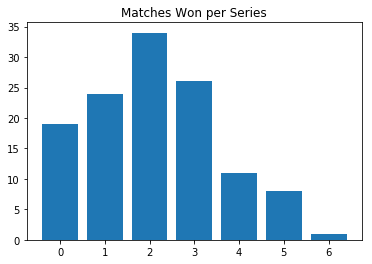

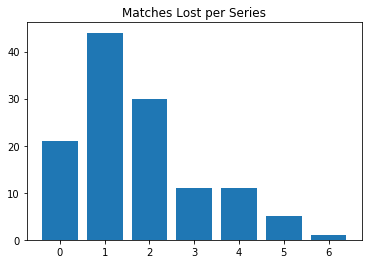

In [43]:
fig1, ax1 = plt.subplots()
ax1.bar(np.arange(len(ds_series.groupby('Ind Match Win')['Ind Match Win'])),ds_series.groupby('Ind Match Win')['Ind Match Win'].count())
ax1.set_xticks(np.arange(7),[0,1,2,3,4,5,6])
ax1.set_title('Matches Won per Series')

fig2, ax2 = plt.subplots()
ax2.bar(np.arange(len(ds_series.groupby('Ind Match Loss')['Ind Match Loss'])),ds_series.groupby('Ind Match Loss')['Ind Match Loss'].count())
ax2.set_xticks(np.arange(7),[0,1,2,3,4,5,6])
ax2.set_title('Matches Lost per Series')

plt.show()

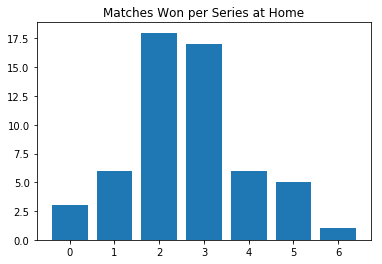

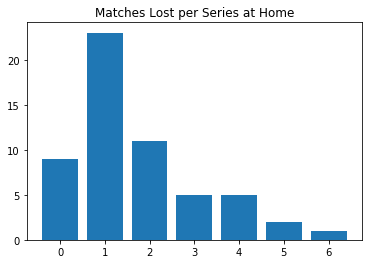

In [44]:
fig1, ax1 = plt.subplots()
ax1.bar(np.arange(len(ds_series[ds_series['Home/Away']=='Home'].groupby('Ind Match Win')['Ind Match Win'])),ds_series[ds_series['Home/Away']=='Home'].groupby('Ind Match Win')['Ind Match Win'].count())
ax1.set_xticks(np.arange(7),[0,1,2,3,4,5,6])
ax1.set_title('Matches Won per Series at Home')

fig2, ax2 = plt.subplots()
ax2.bar(np.arange(len(ds_series[ds_series['Home/Away']=='Home'].groupby('Ind Match Loss')['Ind Match Loss'])),ds_series[ds_series['Home/Away']=='Home'].groupby('Ind Match Loss')['Ind Match Loss'].count())
ax2.set_xticks(np.arange(7),[0,1,2,3,4,5,6])
ax2.set_title('Matches Lost per Series at Home')

plt.show()

In [45]:
ds_series[(ds_series['Total Matches'].astype(int) == 5) & (ds_series['Home/Away']=='Home')].groupby('Ind Match Win')['Ind Match Loss'].count()

Ind Match Win
0    2
1    1
2    4
3    9
4    5
5    4
Name: Ind Match Loss, dtype: int64

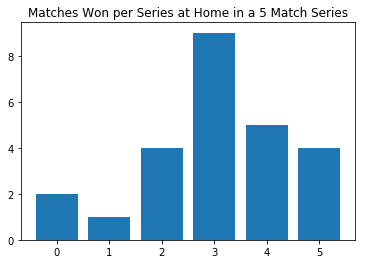

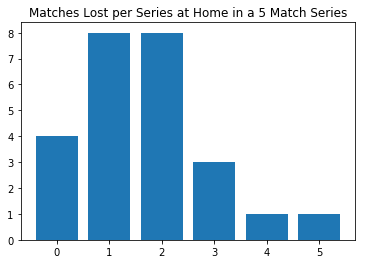

In [46]:
fig1, ax1 = plt.subplots()
ax1.bar(np.arange(len(ds_series[(ds_series['Total Matches'].astype(int) == 5) & (ds_series['Home/Away']=='Home')].groupby('Ind Match Win')['Ind Match Win'])),ds_series[(ds_series['Total Matches'].astype(int) == 5) & (ds_series['Home/Away']=='Home')].groupby('Ind Match Win')['Ind Match Win'].count())
ax1.set_xticks(np.arange(6),[0,1,2,3,4,5])
ax1.set_title('Matches Won per Series at Home in a 5 Match Series')

fig2, ax2 = plt.subplots()
ax2.bar(np.arange(len(ds_series[(ds_series['Total Matches'].astype(int) == 5) & (ds_series['Home/Away']=='Home')].groupby('Ind Match Loss')['Ind Match Loss'])),ds_series[(ds_series['Total Matches'].astype(int) == 5) & (ds_series['Home/Away']=='Home')].groupby('Ind Match Loss')['Ind Match Loss'].count())
ax2.set_xticks(np.arange(6),[0,1,2,3,4,5])
ax2.set_title('Matches Lost per Series at Home in a 5 Match Series')

plt.show()

In [47]:
ds_series[ds_series['Home/Away']=='Home'].groupby('Ind Win/Loss')['Home/Away'].count()

Ind Win/Loss
Loss    13
Tie      4
Win     39
Name: Home/Away, dtype: int64

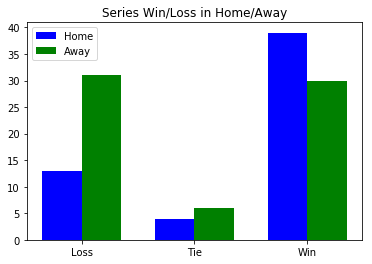

In [48]:
N = 3
Home = ds_series[ds_series['Home/Away']=='Home'].groupby('Ind Win/Loss')['Home/Away'].count().values

fig, ax = plt.subplots()

ind = np.arange(N)   
width = 0.35
p1 = ax.bar(ind, Home, width, color='b')


Away = ds_series[ds_series['Home/Away']=='Away'].groupby('Ind Win/Loss')['Home/Away'].count().values
p2 = ax.bar(ind + width, Away, width,
            color='g')

ax.set_title('Series Win/Loss in Home/Away')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('Loss', 'Tie', 'Win'))

ax.legend((p1[0], p2[0]), ('Home', 'Away'))
ax.autoscale_view()

plt.show()


In [49]:
ds_series[(ds_series['Home/Away']=='Home') & (ds_series['Total Matches'].astype(int)==5)].groupby('Ind Win/Loss')['Home/Away'].count()

Ind Win/Loss
Loss     5
Tie      1
Win     19
Name: Home/Away, dtype: int64

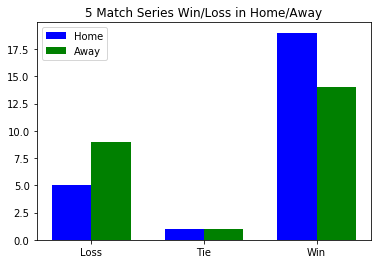

In [50]:
N = 3
Home = ds_series[(ds_series['Home/Away']=='Home') & (ds_series['Total Matches'].astype(int)==5)].groupby('Ind Win/Loss')['Home/Away'].count().values

fig, ax = plt.subplots()

ind = np.arange(N)   
width = 0.35
p1 = ax.bar(ind, Home, width, color='b')


Away = ds_series[(ds_series['Home/Away']=='Away') & (ds_series['Total Matches'].astype(int)==5)].groupby('Ind Win/Loss')['Home/Away'].count().values
p2 = ax.bar(ind + width, Away, width,
            color='g')

ax.set_title('5 Match Series Win/Loss in Home/Away')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('Loss', 'Tie', 'Win'))

ax.legend((p1[0], p2[0]), ('Home', 'Away'))
ax.autoscale_view()

plt.show()


In [51]:
#Recent 10 Home Series Most Recent Last
ds_series[ds_series['Home/Away']=='Home']['Ind Win/Loss'].tail(10)

190     Win
196     Win
197     Win
202    Loss
205     Win
206     Win
210     Win
211     Win
212     Win
216     Win
Name: Ind Win/Loss, dtype: object

In [52]:
#Recent 5 Home Series Against Australia Most Recent Last
ds_series[(ds_series['Home/Away']=='Home') & (ds_series['Against Aus']=='Yes')]['Ind Win/Loss'].tail()

154    Loss
166    Loss
173     Win
189     Win
210     Win
Name: Ind Win/Loss, dtype: object


<h2>1. We can <b><i><u>Predict India to win the Series</b></i></u> based on Past Record and Data Available</h2>
<h2>2. With a 5 Match Series Record of<b><i><u> India Winning 4 Matches in Nagpur, Mohali, Delhi,Ranchi</b></i></u></h2>
<h2>3. India<b><i><u> will lose the Match in Hyderabad </b></i></u>based on past performance record</h2>
<h2>4.<b><i><u> Predict 4-1 (India Win)</b></i></u></h2>
<h2>5. India won 9 out of last 10 Home series</h2>
<h2>6. India won 3 out of last 5 Home series vs Australia</h2>
<h2>7. India won 19 out of 25 5-Match Home Series by winning 3 matches maximum number of times</h2>